# Illinois Pension Outlook

### Simple Comparison - Base Case

This section gives an overview of current revenues and pension appropriations.  
In the final plot, pension appropriations as a % of revenues levels off at ~25%, as expected from the [Edgar ramp](http://www.chicagobusiness.com/section/pensions).

##### Notes
* Revenues from 2012-15 are actual. Revenues 2018-2022 are forecast by GOMB. All others before 2018 are estimated.
* Revenue and pension growth beyond 2022 are both calculated to be 3% per year, based on an extension of the GOMB forecast for both.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

year = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028])
pension_approp = np.array([4157, 4135, 5250, 5593, 6047, 6631, 6971, 7889, 8088, 8330, 8659, 8949, 1.03*8949, (1.03**2)*8949, (1.03**3)*8949, (1.03**4)*8949, (1.03**5)*8949, (1.03**6)*8949])
pension_bil = pension_approp/1000
revenues = np.array([37353, 33695, 36362, 36768, 35888, 31927, 33713, 33461, 33972, 34894, 35802, 36718, 1.03*36718, (1.03**2)*36718, (1.03**3)*36718, (1.03**4)*36718, (1.03**5)*36718, (1.03**6)*36718])
revenues_bil = revenues/1000

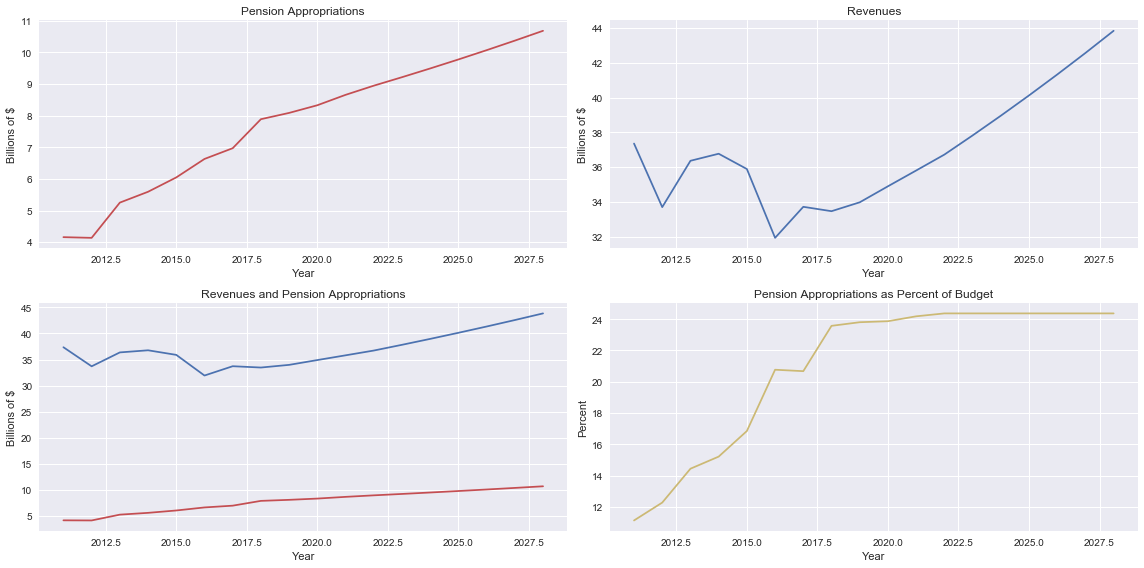

In [3]:
%matplotlib inline

plt.figure(figsize=(16,8))
sns.set_palette('deep', color_codes=True)

plt.subplot(2,2,1)
plt.plot(year, pension_bil, color='r')
plt.xlabel('Year')
plt.ylabel('Billions of $')
plt.title('Pension Appropriations')

plt.subplot(2,2,2)
plt.plot(year, revenues_bil)
plt.xlabel('Year')
plt.ylabel('Billions of $')
plt.title('Revenues')

plt.subplot(2,2,3)
plt.plot(year, revenues_bil, 'b', year, pension_bil, 'r')
plt.xlabel('Year')
plt.ylabel('Billions of $')
plt.title('Revenues and Pension Appropriations')

plt.subplot(2,2,4)
plt.plot(year, pension_bil/revenues_bil*100, color='y')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Pension Appropriations as Percent of Budget')


plt.tight_layout()

## Future Scenarios

Illinois law requires that the pension system be 90% funded by 2045. The Commission on Government Forecasting and Accountability produced [a report](http://cgfa.ilga.gov/Upload/FinConditionILStateRetirementSysMar2017.pdf) in 2016 showing the expected ramp up of contributions, which is displayed below.

In [4]:
# get projection data
mydir = os.getcwd()
ters = pd.read_csv(os.path.join(mydir,'ters.csv'))
sers = pd.read_csv(os.path.join(mydir,'sers.csv'))
surs = pd.read_csv(os.path.join(mydir,'surs.csv'))
jurs = pd.read_csv(os.path.join(mydir,'jurs.csv'))
gars = pd.read_csv(os.path.join(mydir,'gars.csv'))

dates = pd.date_range('1/1/2017', periods=29, freq="AS")

In [5]:
ters.set_index(dates, inplace=True)
sers.set_index(dates, inplace=True)
surs.set_index(dates, inplace=True)
jurs.set_index(dates, inplace=True)
gars.set_index(dates, inplace=True)

ters.index.name='Year'
sers.index.name='Year'
surs.index.name='Year'
jurs.index.name='Year'
gars.index.name='Year'

### Perfect Case

The current forecast contains no planning for a recession. Under this assumption, the CGFA forecast is shown below, meeting the 90% mandate at 2045.

In [6]:
allsrs = ters.add(sers)
allsrs = allsrs.add(surs)
allsrs = allsrs.add(jurs)
allsrs = allsrs.add(gars)

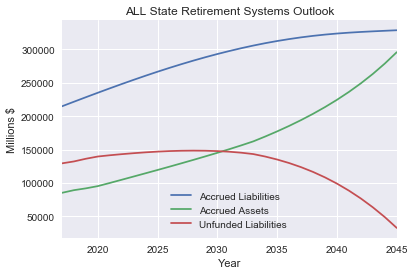

In [7]:
allsrs[['Accrued Liabilities', 'Accrued Assets', 'Unfunded Liabilities']].plot()
plt.ylabel('Millions $')
plt.title('ALL State Retirement Systems Outlook')

### Recession Scenario

The change in net assets is largely dependent upon the performance of the investment assets, as the combination of state and employee payments is almost, but not completely, sufficient to meet the outflow of pension funds. Because the state is required by law to meet the 90% funded benchmark by 2045, funding of the pension system must continue regardless of the impact of a recession on state revenues and the investment portfolio.

In [8]:
fut_year = np.linspace(2017, 2045, (2045-2017+1))

#investment assets & returns
ters_asset = 45.2510 #billions, 2016
ters_ret_avg = np.mean(np.array([19.2, -5.0, -22.7, 12.9, 23.6, 0.8, 12.7, 17.2, 3.9, -0.1]))/100
ters_ret_rec = -0.050 #recession return, 2008
ters_ret_sev = -0.227 #severe recession return, 2009

sers_asset = 15.0385 #billions, 2016
sers_ret_avg = np.mean(np.array([17.1, -6.2, -20.1, 9.1, 21.7, 0.1, 3.7, 17.5, 4.7, -0.8]))/100
sers_ret_rec = -0.062 #recession return, 2008
sers_ret_sev = -0.201 #severe recession return, 2009

surs_asset = 16.9815 #billions, 2016
surs_ret_avg = np.mean(np.array([18.3, -4.5, -19.7, 15.0, 23.8, 0.1, 12.5, 18.2, 2.9, -0.1]))/100
surs_ret_rec = -0.045 #recession return, 2008
surs_ret_sev = -0.197 #severe recession return, 2009

jurs_asset = 0.8403 #billions, 2016
jurs_ret_avg = np.mean(np.array([11.0, 17.1, -6.2, -20.1, 9.1, -0.1, 13.4, 16.8, 4.6, -0.8]))/100
jurs_ret_rec = -0.062 #recession return, 2008
jurs_ret_sev = -0.201 #severe recession return, 2009

gars_asset = 0.0491 #billions, 2016
gars_ret_avg = np.mean(np.array([17.1, -6.2, -20.1, 9.1, 11.7, -0.1, 12.9, 16.3, 4.2, -1.0]))/100
gars_ret_rec = -0.062 #recession return, 2008
gars_ret_sev = -0.201 #severe recession return, 2009

tot_asset = ters_asset+sers_asset+surs_asset+jurs_asset+gars_asset #2016

In [9]:
import statsmodels.api as sm

y = sbdataf['# houses'].values
sbreg = sbdataf.drop(['# houses'],1)
X = sbreg.values
X = sm.add_constant(X)

model1=sm.OLS(y,X)
results1=model1.fit()
results1.summary()

C:\Users\bjr21\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


NameError: name 'sbdataf' is not defined

In [14]:
import ipywidgets as widgets

scenario = widgets.Dropdown(
    options={'No Recession': 1, 'Recession': 2, 'Severe Recession': 3},
    value=1,
    description='Economic Status:',
)
scenario

In [15]:
#Choose investment return scenario
if scenario.value==1:
    ters_ret=0.07
    sers_ret=0.07
    surs_ret=0.0725
    jurs_ret=0.0675
    gars_ret=0.0675
elif scenario.value==2:
    ters_ret=ters_ret_rec
    sers_ret=sers_ret_rec
    surs_ret=surs_ret_rec
    jurs_ret=jurs_ret_rec
    gars_ret=gars_ret_rec
elif scenario.value==3:
    ters_ret=ters_ret_sev
    sers_ret=sers_ret_sev
    surs_ret=surs_ret_sev
    jurs_ret=jurs_ret_sev
    gars_ret=gars_ret_sev